In [33]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [34]:
# laoding file
file_path = 'destroyer_of_worlds.wav'
audio_data, sample_rate = librosa.load(file_path)

### 1. Time domain analysis

##### 1.1 waveform display

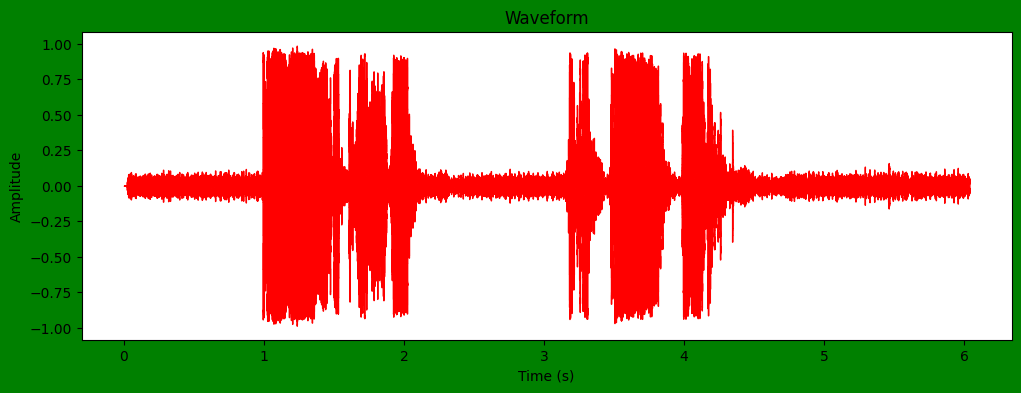

In [35]:
# Create a waveform plot
plt.figure(figsize=(12, 4), facecolor='green')
librosa.display.waveshow(audio_data, color='red')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##### 1.2 Amplitude analysis

len(time) = 520


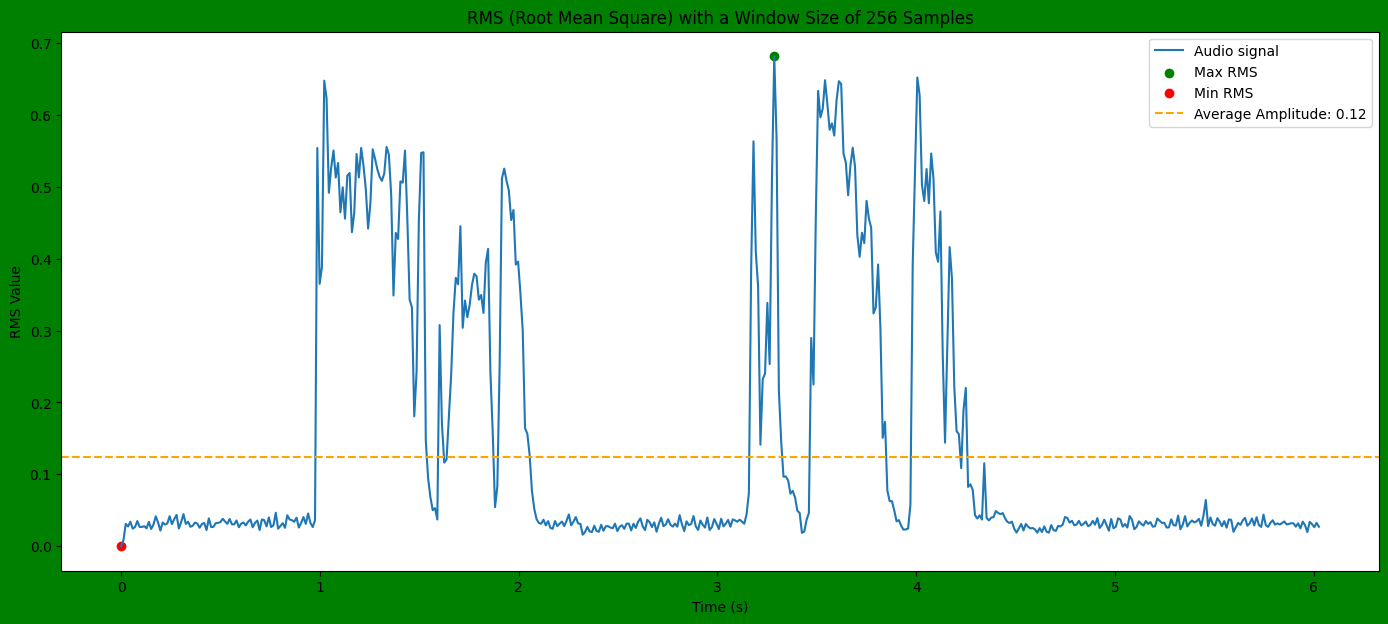

In [43]:
# Define the window size
window_size = 256

# Calculate RMS values with the specified window size
rms_values = []
for i in range(0, len(audio_data), window_size):
    window = audio_data[i:i + window_size]    
    rms = np.sqrt(np.mean(window**2))
    rms_values.append(rms)


# Find the index of the highest and lowest RMS values
max_rms_index = np.argmax(rms_values)
min_rms_index = np.argmin(rms_values)


# Calculate the average amplitude
average_amplitude = np.mean(np.abs(audio_data))


# Create a time array to match the RMS values
time = np.arange(0, len(rms_values)) * window_size / sample_rate

# Plot the RMS values
plt.figure(figsize=(17, 7), facecolor='green')
plt.plot(time, rms_values, label='Audio signal')
plt.title('RMS (Root Mean Square) with a Window Size of 256 Samples')
plt.xlabel('Time (s)')
plt.ylabel('RMS Value')


# Mark the highest and lowest points on the graph
plt.scatter(time[max_rms_index], rms_values[max_rms_index], color='green', label='Max RMS')
plt.scatter(time[min_rms_index], rms_values[min_rms_index], color='red', label='Min RMS')

# Show average amplitude on the graph
plt.axhline(y=average_amplitude, color='orange', linestyle='--', label=f'Average Amplitude: {average_amplitude:.2f}')

plt.legend()
plt.show()

##### 1.3 Marking the beginning and end of the sound

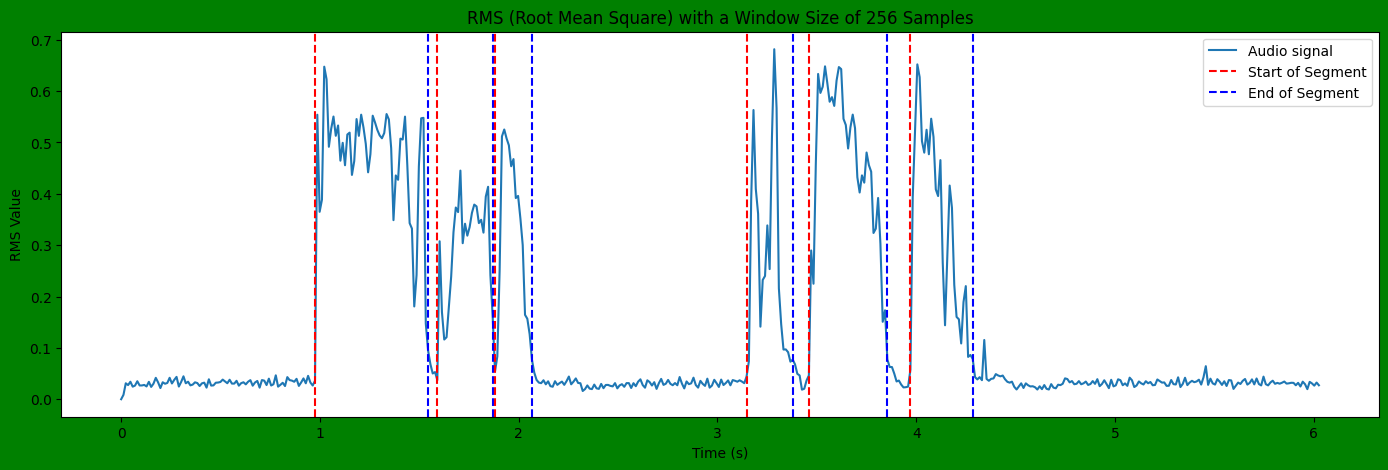

In [37]:
# treshold
treshold = 0.07

# each segment has (start_index, end_index)
starts = []
ends = []

start_index = 0
end_index = 0

minimum_window_size = np.ceil(len(time)*0.02)

# Finding parts of the audio that are louder than the treshold
for idx, value in enumerate(rms_values):
    if value > treshold:
        end_index = idx
    else:
        if end_index - start_index > 0 and end_index - start_index > minimum_window_size:
            starts.append(start_index)
            ends.append(end_index)
        start_index = idx

# Plot the RMS values
plt.figure(figsize=(17, 5), facecolor='green')
plt.plot(time, rms_values, label='Audio signal')
plt.title('RMS (Root Mean Square) with a Window Size of 256 Samples')
plt.xlabel('Time (s)')
plt.ylabel('RMS Value')

add_label = True

# Mark the start and end of each segment
for start, end in zip(starts, ends):
    if add_label:
        plt.axvline(x=time[start], color='red', linestyle='--', label='Start of Segment')
        plt.axvline(x=time[end], color='blue', linestyle='--', label='End of Segment')
        add_label = False
    else:
        plt.axvline(x=time[start], color='red', linestyle='--')
        plt.axvline(x=time[end], color='blue', linestyle='--')

plt.legend()
plt.show()
    

##### 1.4 Zero crossing rate

len(time): 519


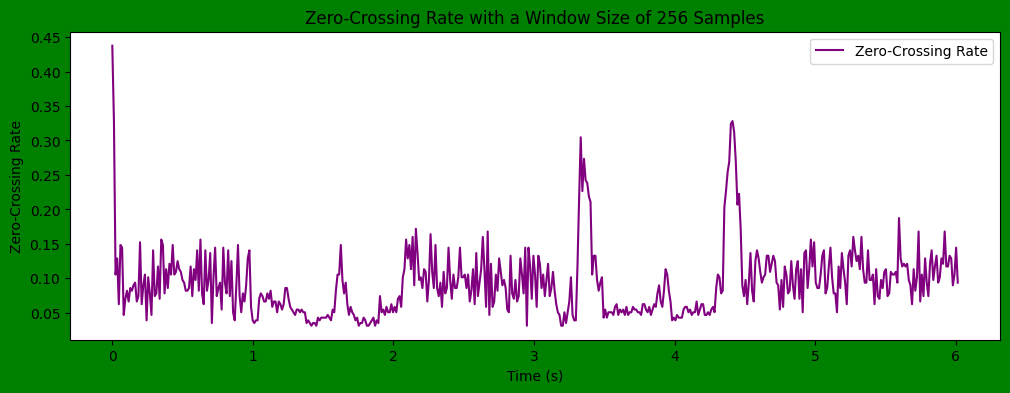

In [42]:
# Define the window size
window_size = 256

# Calculate the zero-crossing rate for each window
zero_crossing_rates = []
for i in range(0, len(audio_data) - window_size + 1, window_size):
    window = audio_data[i:i + window_size]
    zero_crossing_rate = np.sum(np.abs(np.diff(np.sign(window)))) / (2 * window_size)
    zero_crossing_rates.append(zero_crossing_rate)

# Create a time array based on the window size
time = np.arange(0, len(zero_crossing_rates)) * window_size / sample_rate

# Plot the zero-crossing rate
plt.figure(figsize=(12, 4), facecolor='green')
plt.plot(time, zero_crossing_rates, label='Zero-Crossing Rate', color='purple')
plt.title('Zero-Crossing Rate with a Window Size of 256 Samples')
plt.xlabel('Time (s)')
plt.ylabel('Zero-Crossing Rate')

plt.legend()
plt.show()

### 2. Frequency domain analysis

##### 2.1 Spectogram

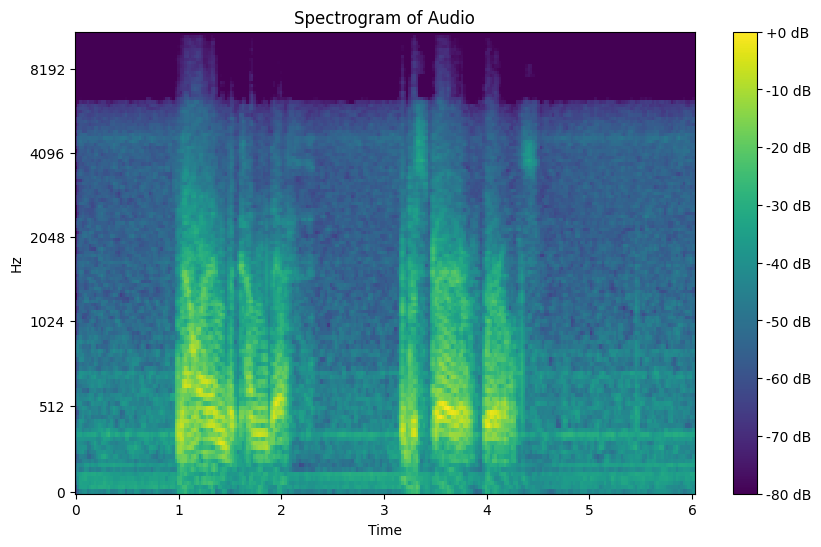

In [39]:
# Calculate the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

# Convert the power spectrogram to dB scale
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Audio')
plt.show()

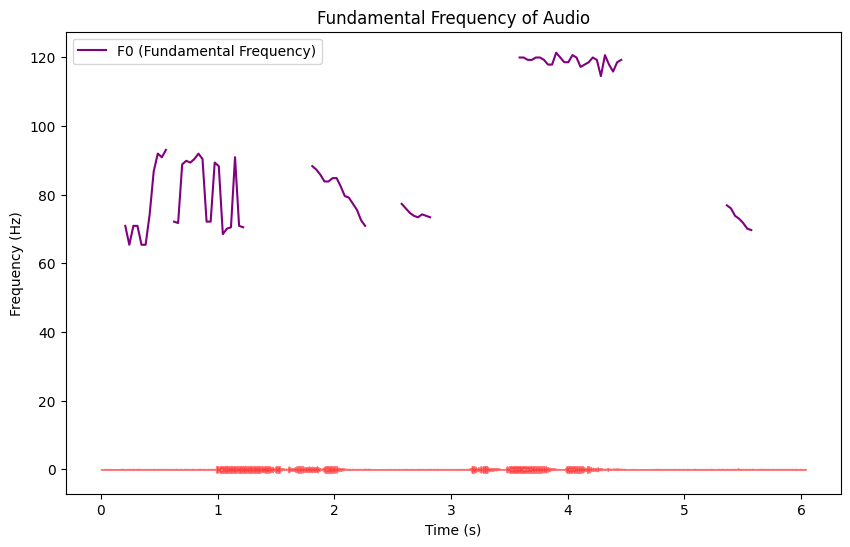

In [47]:
# Calculate the fundamental frequency (F0)
f0, voiced_flag, voiced_probs = librosa.pyin(audio_data, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Create a time array for the F0 values
time = np.arange(0, len(f0)) * window_size / sample_rate


# Plot the audio waveform and the F0
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio_data, alpha=0.5, color='red')
plt.plot(time*3, f0, label='F0 (Fundamental Frequency)', color='purple')
plt.title('Fundamental Frequency of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.show()